In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.utils import shuffle
import itertools
import keras.backend as K
from keras.layers import LSTM,Input,Lambda,concatenate, Dense,Dropout,GRU,BatchNormalization,Embedding
from keras.utils import to_categorical
from keras.models import Model
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix,accuracy_score
from keras.utils import to_categorical
import seaborn as sns
import tensorflow as tf
from random import randrange
from keras.optimizers import Nadam,Adagrad,Adam
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

# pre process

In [0]:
#read data
train = pd.read_csv("/content/gdrive/My Drive/ass3/train.csv",encoding ='latin1')
test = pd.read_csv("/content/gdrive/My Drive/ass3/test.csv",encoding ='latin1')
att = pd.read_csv("/content/gdrive/My Drive/ass3/attributes.csv",encoding ='latin1')
des = pd.read_csv("/content/gdrive/My Drive/ass3/product_descriptions.csv",encoding ='latin1')
sol = pd.read_csv("/content/gdrive/My Drive/ass3/solution.csv", encoding='latin1')
trainbrand = pd.read_csv('/content/gdrive/My Drive/ass3/trainbrand.csv', encoding='latin1')

train = trainbrand


In [0]:
path = "/content/gdrive/My Drive/ass3/"

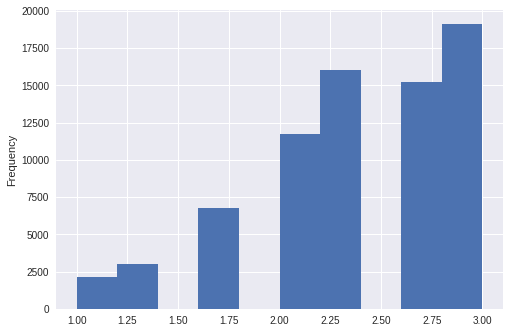

In [7]:
#data exploration
train['relevance'].plot.hist() #

In [0]:
train = train.merge(des , how='inner', on ='product_uid')
test = test.merge(des , how='inner', on ='product_uid')

In [0]:
train.head()

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...


In [9]:
import nltk
nltk.download('stopwords')
stops = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#pre process for word embedings
# documents = []
# for dataset in [train, test]:
#     for index,line in dataset.iterrows():
#         row = line['product_description'].lower().split(' ')
#         if len(row)>200:
#             row = row[:200]
#         #documents.append(line['product_title'].lower().split(' '))  #gensim.utils.simple_preprocess(line['product_title'].lower())
#         documents.append(row)
#         documents.append(line['search_term'].lower().split(' ') ) #gensim.utils.simple_preprocess(line['search_term'].lower())


In [0]:
#our train w2v model
model = Word2Vec.load(path+"word2vec.model")

In [0]:
# build vocabulary and train model
# model = Word2Vec(
#     documents,
#     size=16,
#     window=5,
#     min_count=2,
#     workers=10)
# model.train(documents, total_examples=len(documents), epochs=20)
# model.save("word2vec.model")

In [0]:
#plot word2vec
# X = model[model.wv.vocab]
# pca = PCA(n_components=2)
# result = pca.fit_transform(X)
# # create a scatter plot of the projection
# plt.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
# for i, word in enumerate(words):
#     plt.annotate(word, xy=(result[i, 0], result[i, 1]))
# plt.rcParams['image.cmap'] = 'RdBu'
# plt.show()

In [11]:
#test the word2vec
w1 = 'sound'
model.wv.most_similar(positive=w1)


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('greatly', 0.9150655269622803),
 ('noise', 0.8910049200057983),
 ('ultrasound', 0.8507346510887146),
 ('performanceultra', 0.8444237112998962),
 ('insulation', 0.8315243721008301),
 ('sound,', 0.8195143342018127),
 ('ornamentation,', 0.8135421872138977),
 ('koniecups', 0.8111819624900818),
 ('kiln-drying', 0.8106271028518677),
 ('single-pane', 0.8077735900878906)]

In [16]:
words = list(model.wv.vocab)
np.array([model.wv.get_vector(tok) if tok in model.wv.vocab else model.wv.get_vector(tok) 
           for tok in words]).shape

(285551, 16)

In [0]:
columns = train.columns[1:]
train.head()

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...


# Data Generators

In [0]:
#data generators

train_small_values_f = train.query("relevance < 1.67")
agg_train = train.copy()
train_small_values_f.shape
questions_cols = ['product_title','search_term']
agg_train.drop('product_uid',inplace=True,axis=1)
id_ = agg_train.shape[0] #last id
columns = agg_train.columns
print (columns)
flag = False

for index,row in train_small_values_f.iterrows():
        new_row =[]
        new_row.append(id_)
        for question in questions_cols:
            bagofwords = str(row[question]).lower().split(' ')
            x = 3 if 3<len(bagofwords) else len(bagofwords)
            i = 0
            while i < x:
                random_index = randrange(len(bagofwords))
                w1 = bagofwords[random_index]
                if w1 not in model.wv.vocab:
                    flag = True
                    break
                bagofwords[random_index] = model.wv.most_similar(positive=w1)[0][0]
                i +=1
            flag = False
            new_sant =' '.join(map(str, bagofwords))
            new_row.append(new_sant)
        if flag == False:
            new_row.append(row['relevance'])
            new_row.append(row['product_description'])
            print(id_)
            new_row_df = pd.DataFrame(new_row,columns)
            new_row_df = new_row_df.T
            agg_train = agg_train.append(new_row_df)
            id_ = id_+1   
            
       


Index(['id', 'product_title', 'search_term', 'relevance',
       'product_description'],
      dtype='object')
74067
74068
74069
74070


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


74071
74072
74073
74074
74075
74076
74077
74078
74079
74080
74081
74082
74083
74084
74085
74086
74087
74088
74089
74090
74091
74092
74093
74094
74095
74096
74097
74098
74099
74100
74101
74102
74103
74104
74105
74106
74107
74108
74109
74110
74111
74112
74113
74114
74115
74116
74117
74118
74119
74120
74121
74122
74123
74124
74125
74126
74127
74128
74129
74130
74131
74132
74133
74134
74135
74136
74137
74138
74139
74140
74141
74142
74143
74144
74145
74146
74147
74148
74149
74150
74151
74152
74153
74154
74155
74156
74157
74158
74159
74160
74161
74162
74163
74164
74165
74166
74167
74168
74169
74170
74171
74172
74173
74174
74175
74176
74177
74178
74179
74180
74181
74182
74183
74184
74185
74186
74187
74188
74189
74190
74191
74192
74193
74194
74195
74196
74197
74198
74199
74200
74201
74202
74203
74204
74205
74206
74207
74208
74209
74210
74211
74212
74213
74214
74215
74216
74217
74218
74219
74220
74221
74222
74223
74224
74225
74226
74227
74228
74229
74230
74231
74232
74233
74234
74235
74236
7423

In [0]:
agg_train.tail()

,id,product_title,search_term,relevance,product_description
79182,79182,rubbermaid residential products 4 qt. 1/3 size...,commercial size compartment,1,Rubbermaid Commercial Product's Cold Food pans...
79183,79183,dwst08203 universal areas.24 mechanics tool ha...,flick through rings.neutral rings,1.33,The Husky 126-Piece Pass-Through Socket and Ra...
79184,79184,hydronix 18 in. x 2-1/2 in. inline coconut car...,pivot 13 water filter,1.33,If you already have an inline filter and want ...
79185,79185,fanseasy 5 ft. oil rubbed bronze beaded chain ...,ceiling fan features chain cord,1,This Westinghouse Lighting Oil Rubbed Bronze B...
79186,79186,atlantic designwindsor 576 cd or 192 dvd ipads...,tv bases2 glass,1,"Atlantic, Inc. 94835722 Uniquely designed for ..."


In [0]:

agg_train.reset_index(inplace=True)
agg_train.drop(['index'],inplace=True,axis=1)


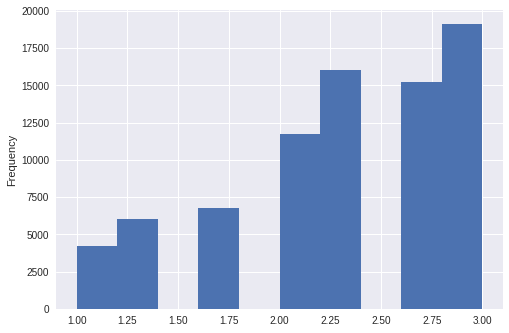

In [0]:
 agg_train['relevance'].plot.hist() #

In [0]:
train = agg_train

# more pre - process


In [0]:
most_freq_word = 0
for word, vocab_obj in model.wv.vocab.items():
    if vocab_obj.count > most_freq_word:
        most_freq_word = vocab_obj.count

In [98]:
#change the dataset to numeric 
max_seq_length_left = 0
max_seq_length_right = 0
questions_cols = ['product_description','search_term']
vocabulary = dict()
count = 1 
for dataset in [train, test]:
    for index, row in dataset.iterrows():
        # Iterate through the text of both questions of the row
        for question in questions_cols:
            q2n = []  # q2n -> question numbers representation
            bagofwords = str(row[question]).lower().split(' ')
            if len(bagofwords)>100:
                bagofwords = bagofwords[:100] 
            if question == questions_cols[0]:
                max_seq_length_left = len(bagofwords) if max_seq_length_left < len(bagofwords) else max_seq_length_left
            else:
                 max_seq_length_right = len(bagofwords) if max_seq_length_right < len(bagofwords) else max_seq_length_right
            for word in bagofwords:
                # Check for unwanted words
                #future use
                if word in stops :    #model.wv.vocab['toy'].count/most_freq_word >= 0.7
                    continue
                if word not in vocabulary:
                    vocabulary[word] = count
                    q2n.append(count)
                    count +=1
                else:
                    q2n.append(vocabulary[word])

            # Replace questions with lists of word indices
            dataset.set_value(index, question, q2n)
train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,product_uid,product_title,search_term,relevance,product_description
0,100001,Simpson Strong-Tie 12-Gauge Angle Simpson Stro...,"[57, 58]",3.00,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,[121],3.00,"[59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7..."
2,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,"[175, 127, 176]",2.33,"[122, 123, 124, 125, 126, 127, 128, 129, 130, ..."
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,"[127, 128]",2.67,"[122, 123, 124, 125, 126, 127, 128, 129, 130, ..."
4,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,"[186, 236]",3.00,"[177, 178, 179, 180, 181, 182, 183, 184, 185, ..."


In [99]:
len(vocabulary)

329464

In [100]:
print(max_seq_length_left)
print(max_seq_length_right)

100
34


In [0]:
#create embedding 
word2vec = model.wv
embedding_dim = 16
embeddings = 1 * np.random.randn(len(vocabulary) + 1, embedding_dim)  
embeddings[0] = 0  # So that the padding will be ignored
for word, index in vocabulary.items():
    if word in word2vec.vocab:
        embeddings[index] = word2vec.word_vec(word)
np.savetxt("embeddings.csv", embeddings, delimiter=",")


In [102]:
embeddings.shape

(329465, 16)

# split to train val test

In [0]:
#split to train and val
X = train[questions_cols]
Y = train['relevance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.15)
# Split to dicts
X_train = {'left': X_train[questions_cols[0]], 'right': X_train[questions_cols[1]]}
X_validation = {'left': X_validation[questions_cols[0]], 'right': X_validation[questions_cols[1]]}
X_test = {'left': X_test[questions_cols[0]], 'right': X_test[questions_cols[1]]}
# Convert labels to their numpy representations
Y_train = Y_train.values
Y_validation = Y_validation.values

# Zero padding
for dataset, side in itertools.product([X_train, X_validation], ['left', 'right']):
       if side == 'left':
            dataset[side] = pad_sequences(dataset[side],  maxlen=max_seq_length_left, padding = 'post')
       else:
            dataset[side] = pad_sequences(dataset[side],  maxlen=max_seq_length_right, padding = 'post')

In [104]:
print(X.shape)


(74008, 2)


In [0]:
#split for kfold
# X = train[questions_cols]
# Y = train['relevance']
# #to categorial
# print (len(Y.unique()))
# relevance = {p:i for (i,p) in enumerate(Y.unique())}
# print (len(relevance))
# Y = [relevance[x] for x in Y]
# Y = np.asarray(Y)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
# X_train = {'left': X_train[questions_cols[0]], 'right': X_train[questions_cols[1]]}
# X_test = {'left': X_test[questions_cols[0]], 'right': X_test[questions_cols[1]]}
# # Zero padding
# for dataset, side in itertools.product([X_train], ['left', 'right']):
#        if side == 'left':
#             dataset[side] = pad_sequences(dataset[side],  maxlen=max_seq_length_left, padding = 'post')
#        else:
#             dataset[side] = pad_sequences(dataset[side],  maxlen=max_seq_length_right, padding = 'post')

# prediction models

In [0]:
def exponent_neg_manhattan_distance(left, right):
    ans = (K.sum(left*right))/(K.sqrt(K.sum(K.pow(left,2)))*K.sqrt(K.sum(K.pow(right,2))))
    return ans*2 +1

In [0]:
# def cossim(left, right):
#     ans = (K.sum(left*right))/(K.sqrt(K.sum(K.pow(left,2)))*K.sqrt(K.sum(K.pow(right,2))))
#     ans = tf.nn.relu(ans)
#     return ans

In [106]:
#first model with embedding
batch_size = 800
n_epoch = 20
n_hidden = 300
left_input = Input(shape=(max_seq_length_left,), dtype='int32')
right_input = Input(shape=(max_seq_length_right,), dtype='int32')
encoded_left = Embedding(len(embeddings), embedding_dim, weights=[embeddings], input_length=max_seq_length_left, trainable=False)(left_input)
encoded_right = Embedding(len(embeddings), embedding_dim, weights=[embeddings], input_length=max_seq_length_right, trainable=False)(right_input)
shared_lstm = LSTM(n_hidden)
left_out = shared_lstm(encoded_left)
right_out = shared_lstm(encoded_right)
left_out_norm = BatchNormalization()(left_out)
right_out_norm = BatchNormalization()(right_out)
malstm_distance = Lambda(function=lambda x: exponent_neg_manhattan_distance(x[0], x[1]),output_shape=lambda x: (1, 1))([left_out_norm, right_out_norm])
malstm = Model([left_input, right_input], [malstm_distance])
#nd = Nadam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#nd = Adagrad(lr=0.01, epsilon=None, decay=0.0)
#nd = Adam(lr=0.01)
malstm.compile(loss = "mse", optimizer = 'adam' , metrics=['mse','mae'] )
malstm.summary()




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 100)          0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           (None, 34)           0                                            
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 100, 16)      5271440     input_17[0][0]                   
__________________________________________________________________________________________________
embedding_18 (Embedding)        (None, 34, 16)       5271440     input_18[0][0]                   
__________________________________________________________________________________________________
lstm_9 (LS

In [0]:
#second model with embedding and regresion 
# batch_size = 600
# n_epoch = 10
# n_hidden = 150
# left_input = Input(shape=(max_seq_length_left,), dtype='int32')
# right_input = Input(shape=(max_seq_length_right,), dtype='int32')
# encoded_left = Embedding(len(embeddings), embedding_dim, weights=[embeddings], input_length=max_seq_length_left, trainable=False)(left_input)
# encoded_right = Embedding(len(embeddings), embedding_dim, weights=[embeddings],
#                           input_length=max_seq_length_right, trainable=False)(right_input)
# shared_lstm = LSTM(n_hidden)
# left_out = shared_lstm(encoded_left)
# right_out = shared_lstm(encoded_right)
# left_out_norm = BatchNormalization()(left_out)
# right_out_norm = BatchNormalization()(right_out)
# merged_vector = concatenate([left_out_norm, right_out_norm], axis=-1)
# x = Dense(128,activation="relu")(merged_vector)
# drop = Dropout(0.5)(x)
# x = Dense(64,activation="relu")(drop)
# output = Dense(1,activation="linear")(x)
# # after_drop = drop(predictions2)
# #malstm_distance = Lambda(function=lambda x: exponent_neg_manhattan_distance(x[0], x[1]),output_shape=lambda x: (1, 1))([left_out, right_out])
# malstm = Model([left_input, right_input], [output])
# #nd = Nadam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
# #nd = Adagrad(lr=0.01, epsilon=None, decay=0.0)
# #nd = Adam(lr=0.005)
# malstm.compile(loss = "mse", optimizer = 'adam' )
# malstm.summary()


In [107]:
malstm_trained = malstm.fit([X_train['left'], X_train['right']], Y_train, batch_size=batch_size, nb_epoch=n_epoch,
                            validation_data=([X_validation['left'],X_validation['right']], Y_validation),verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 53470 samples, validate on 9436 samples
Epoch 1/20
53470/53470 [==============================] - 41s 762us/step - loss: 0.3712 - mean_squared_error: 0.3712 - mean_absolute_error: 0.5025 - val_loss: 0.2994 - val_mean_squared_error: 0.2994 - val_mean_absolute_error: 0.4603
Epoch 2/20
53470/53470 [==============================] - 36s 678us/step - loss: 0.3366 - mean_squared_error: 0.3366 - mean_absolute_error: 0.4857 - val_loss: 0.2805 - val_mean_squared_error: 0.2805 - val_mean_absolute_error: 0.4368
Epoch 3/20
53470/53470 [==============================] - 36s 679us/step - loss: 0.2890 - mean_squared_error: 0.2890 - mean_absolute_error: 0.4401 - val_loss: 0.2831 - val_mean_squared_error: 0.2831 - val_mean_absolute_error: 0.4390
Epoch 4/20
53470/53470 [==============================] - 36s 678us/step - loss: 0.2895 - mean_squared_error: 0.2895 - mean_absolute_error: 0.4412 - val_loss: 0.2802 - val_mean_squared_error: 0.2802 - val_mean_absolute_error: 0.4365
Epoch 5/20
53470/53

In [0]:
def plot_model_lost(history,model_name):
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

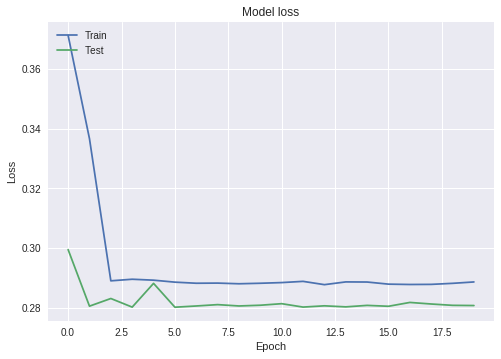

In [110]:
plot_model_lost(malstm_trained,'model_1')


In [0]:
# Zero padding
for dataset, side in itertools.product([X_test], ['left', 'right']):
      if side == 'left':
            dataset[side] = pad_sequences(dataset[side],  maxlen=max_seq_length_left, padding = 'post')
      else:
            dataset[side] = pad_sequences(dataset[side],  maxlen=max_seq_length_right, padding = 'post')

In [0]:
preds = malstm.predict([X_test['left'], X_test['right']])

0.5619362056025629
0.4578824078261455


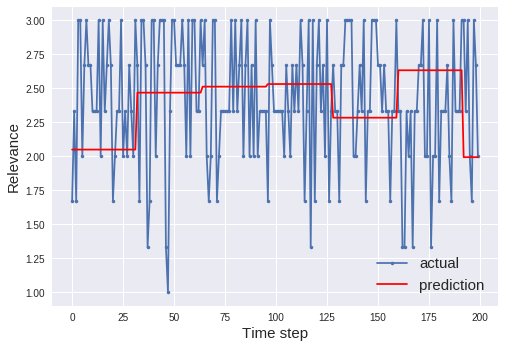

In [113]:

rmse = np.sqrt(mean_squared_error(preds, Y_test))
MAE = mean_absolute_error(preds, Y_test)
print(rmse)
print(MAE)
aa=[x for x in range(200)]
plt.plot(aa, Y_test[:200], marker='.', label="actual")
plt.plot(aa, preds[:200], 'r', label="prediction")
plt.ylabel('Relevance', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

# categorial models

In [0]:
#second model with embedding
batch_size = 2500
n_epoch = 5
n_hidden = 150
left_input = Input(shape=(max_seq_length_left,), dtype='int32')
right_input = Input(shape=(max_seq_length_right,), dtype='int32')

encoded_left = Embedding(len(embeddings), embedding_dim, weights=[embeddings], input_length=max_seq_length_left, trainable=False)(left_input)
encoded_right = Embedding(len(embeddings), embedding_dim, weights=[embeddings],
                          input_length=max_seq_length_right, trainable=False)(right_input)
shared_lstm = LSTM(n_hidden)
left_out = shared_lstm(encoded_left)
right_out = shared_lstm(encoded_right)
left_out_norm = BatchNormalization()(left_out)
right_out_norm = BatchNormalization()(right_out)
#malstm_distance = Lambda(function=lambda x: exponent_neg_manhattan_distance(x[0], x[1]),output_shape=lambda x: (1, 1))([left_out, right_out])
merged_vector = concatenate([left_out_norm, right_out_norm], axis=-1)
#malstm_distance = Lambda(function=lambda x: cossim(x[0], x[1]),output_shape=lambda x: (1, 1))([left_out, right_out])
predictions2 = Dense(20,activation="relu")(merged_vector)
drop = Dropout(0.5)
after_drop = drop(predictions2)
output = Dense(13,activation="softmax")(after_drop)
malstm = Model([left_input, right_input], [output])
malstm.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
malstm.summary()

In [0]:
#model 1 with k -fold stratifed
skf = StratifiedKFold(n_splits=5,random_state=42)
for tr_ind,val_ind in skf.split(X_train['left'],Y_train):
    print (tr_ind,val_ind)
    X_train_left,X_val_left,y_train,y_val = X_train['left'][tr_ind],X_train['left'][val_ind],Y_train[tr_ind],Y_train[val_ind]
    X_train_right,X_val_right = X_train['right'][tr_ind],X_train['right'][val_ind]
    malstm_trained = malstm.fit([X_train_left,X_train_right],to_categorical(y_train), batch_size=batch_size,verbose=1,
                                nb_epoch=n_epoch,validation_data = [[X_val_left,X_val_right],to_categorical(y_val)])
   
    

In [0]:
# Zero padding
for dataset, side in itertools.product([X_test], ['left', 'right']):
      if side == 'left':
            dataset[side] = pad_sequences(dataset[side],  maxlen=max_seq_length_left, padding = 'post')
      else:
            dataset[side] = pad_sequences(dataset[side],  maxlen=max_seq_length_right, padding = 'post')

In [0]:
 preds = malstm.predict([X_test['left'], X_test['right']])

In [0]:
pred_cat = np.argmax(preds,axis=1)

In [0]:
def present_matrix(preds):
  pred_cat = np.argmax(preds,axis=1)
  print('')
  print(confusion_matrix(Y_test,pred_cat))
  print()
  print('model accuracy on test set is: {}%'.format(accuracy_score(Y_test,pred_cat)*100))
  sns.heatmap(confusion_matrix(Y_test,pred_cat),cmap='Greens',annot=True, fmt='d')
  plt.xlabel('Prediction')
  plt.ylabel('True label')
  plt.title('lassification results on test set')

In [0]:
present_matrix(preds)

In [0]:
pred_cat = np.argmax(preds,axis=1)
rmse = np.sqrt(mean_squared_error(pred_cat, Y_test))
MAE = mean_absolute_error(pred_cat, Y_test)
print (rmse)
print(MAE)
aa=[x for x in range(100)]
plt.plot(aa, Y_test[:100], marker='.', label="actual")
plt.plot(aa, pred_cat[:100], 'r', label="prediction")
plt.ylabel('Relevance', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

# featurs extract

In [0]:
# featurs extract
#get the output of the concat layer and use it as features to the ml models

print (X_test['left'].shape)
left_out_norm = malstm.get_layer('batch_normalization_5').output
right_out_norm = malstm.get_layer('batch_normalization_6').output
merged_vector = concatenate([left_out_norm, right_out_norm], axis=-1)
feature_model = Model(malstm.input, merged_vector)
feature_model.compile(loss='mse', optimizer='adam')
print(feature_model.summary())

# we use the output of the concat layer as fetures so they will be the input to the xgb and lgb models
featurs = feature_model.predict([X_train['left'], X_train['right']])

# we preform the prediction also on the test set to evaluate the mse on test set
features_test = feature_model.predict([X_test['left'], X_test['right']])



(53512, 38)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 38)           0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 38, 16)       781008      input_5[0][0]                    
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 34, 16)       781008      input_6[0][0]                    
_________________________________________________________________________________________________

In [0]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=150, learning_rate=0.01, gamma=0, subsample=0.7, colsample_bytree=1, max_depth=6)
xgb_model.fit(featurs, Y_train)
xgb_pred = xgb_model.predict(features_test)

import lightgbm as lgb
# lgb
lgb_model = lgb.sklearn.LGBMRegressor(is_unbalance=True, learning_rate =0.001, subsample=0.7, colsample_bytree=0.7, max_depth=6)
lgb_model.fit(featurs, Y_train)
lgb_pred = lgb_model.predict(features_test)


Test RMSE: 0.661
Test MAE: 0.564


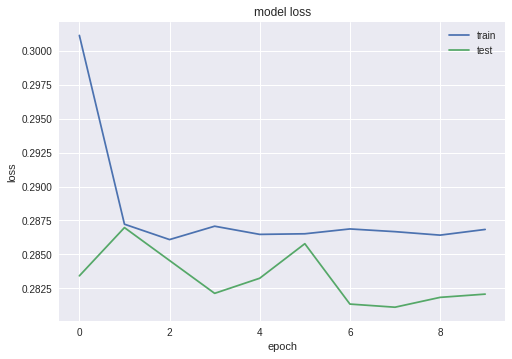

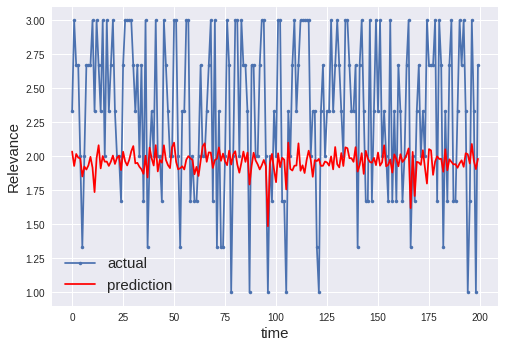

In [0]:

rmse = np.sqrt(mean_squared_error(xgb_pred, Y_test))

MAE = mean_absolute_error(xgb_pred, Y_test)

print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % MAE)
plt.plot(malstm_trained.history['loss'])
plt.plot(malstm_trained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
aa=[x for x in range(200)]
plt.plot(aa, Y_test[:200], marker='.', label="actual")
plt.plot(aa, xgb_pred[:200], 'r', label="prediction")
plt.ylabel('Relevance', size=15)
plt.xlabel('time', size=15)
plt.legend(fontsize=15)
plt.show()

# KAGGLE TEST

In [0]:

sol = pd.read_csv(path+'solution.csv')
test = test.merge(sol , how='inner', on='id')

In [60]:
test = test.query("Usage != 'Ignored'")
test.head()

,id,product_uid,product_title,search_term,product_description,relevance,Usage
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,"[336, 5994, 952]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2.33,Public
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,"[10, 19392, 2452]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2.33,Private
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,"[10, 583, 89, 11823]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2.67,Private
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,"[10, 583, 6576, 197549]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2.00,Public
6,10,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,"[1198, 127, 130]","[2036, 19998, 1324, 1438, 260, 39921, 362, 114...",2.67,Private


In [0]:
# Split to dicts
X_test = {'left': test[questions_cols[0]], 'right': test[questions_cols[1]]}
# Convert labels to their numpy representations
# Zero padding
for dataset, side in itertools.product([X_test], ['left', 'right']):
      if side == 'left':
            dataset[side] = pad_sequences(dataset[side],  maxlen=max_seq_length_left, padding = 'post')
      else:
            dataset[side] = pad_sequences(dataset[side],  maxlen=max_seq_length_right, padding = 'post')


In [0]:
predictions = malstm.predict([X_test['left'], X_test['right']])

In [34]:
#submission
sub_df = pd.DataFrame({"id":test["id"].values})
sub_df["relevance"] = predictions.T
print(sub_df.head())
sub_df.to_csv(path+"submit_new.csv", index=False)

   id  relevance
0   1   2.360183
1   4   2.360183
2   5   2.360183
3   6   2.360183
4   7   2.360183


In [0]:
Y_test = test['relevance']

0.5390227784380643
0.4406562007402924


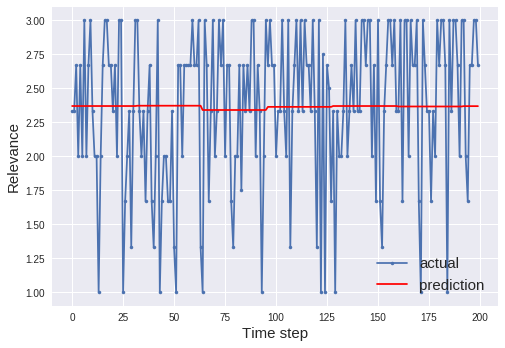

In [64]:
rmse = np.sqrt(mean_squared_error(predictions, Y_test))
MAE = mean_absolute_error(predictions, Y_test)
print(rmse)
print(MAE)
aa=[x for x in range(200)]
plt.plot(aa, Y_test[:200], marker='.', label="actual")
plt.plot(aa, preds[:200], 'r', label="prediction")
plt.ylabel('Relevance', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [0]:
#navie model
# x = np.zeros(Y_test.shape[0])
# x += Y_test.mean()
# rmse = np.sqrt(mean_squared_error(x, Y_test))
# MAE = mean_absolute_error(x, Y_test)
# print(rmse)
# print(MAE)